From pyOpenMS [user guide](https://pyopenms.readthedocs.io/en/latest/user_guide/ms_data.html)

In [13]:
import pyopenms as oms
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import clear_output

In [5]:
# working directory
DIR = os.path.dirname(os.getcwd())
# directory where the mzML files are located
DATA_DIR = os.path.join(DIR, "data/ms_data/mzml")

# list of mzML files
mzml_files = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR)]

print(f"{len(mzml_files)} mzML files found in {DATA_DIR}")
mzml_files[1]

329 mzML files found in /media/sf_vmshare/Projects/thesis_mbds/data/ms_data/mzml


'/media/sf_vmshare/Projects/thesis_mbds/data/ms_data/mzml/Blank10.mzML'

In [63]:
## Function definitions
# generate ms vs. rt plot
def plot_spectra_2D_overview(exp, name=""):
    rows = 200.0
    cols = 200.0
    exp.updateRanges()

    bilip = oms.BilinearInterpolation()
    tmp = bilip.getData()
    tmp.resize(int(rows), int(cols), float())
    bilip.setData(tmp)
    bilip.setMapping_0(0.0, exp.getMinRT(), rows - 1, exp.getMaxRT())
    bilip.setMapping_1(0.0, exp.getMinMZ(), cols - 1, exp.getMaxMZ())
    for spec in exp:
        if spec.getMSLevel() == 1:
            mzs, ints = spec.get_peaks()
            rt = spec.getRT()
            for i in range(0, len(mzs)):
                bilip.addValue(rt, mzs[i], ints[i])

    data = np.ndarray(shape=(int(cols), int(rows)), dtype=np.float64)
    for i in range(int(rows)):
        for j in range(int(cols)):
            data[i][j] = bilip.getData().getValue(i, j)

    plt.imshow(
        np.rot90(data), cmap="gist_heat_r", aspect=0.75
    )  # change image aspect ratio with aspect = 0.5
    plt.xlabel("retention time (s)")
    plt.ylabel("m/z")
    plt.xticks(
        np.linspace(0, int(rows), 10, dtype=int),
        np.linspace(exp.getMinRT(), exp.getMaxRT(), 10, dtype=int),
        fontsize=8,
    )
    plt.yticks(
        np.linspace(0, int(cols), 20, dtype=int),
        np.linspace(exp.getMinMZ(), exp.getMaxMZ(), 20, dtype=int)[::-1],
        fontsize=8,
    )
    cb = plt.colorbar(shrink=0.84, pad=0.01)
    cb.ax.yaxis.set_offset_position("left")
    plt.title(name, loc="left")
    plt.show()


def plot_wrapper(files, start: int = 0):
    """Wrapper function to loop through files and plot spectra.
    Args:
        files (list): list of mzML files
        start (int): index to start at"""
    # set counter
    count = 0
    # loop through files
    for file in files[start:]:
        # Clear the previous output
        clear_output(wait=False)

        # Load mzML file
        name = (os.path.basename(file)).split(".")[0]
        exp = oms.MSExperiment()
        oms.MzMLFile().load(file, exp)

        # Plot spectra
        plot_spectra_2D_overview(exp, name=name)

        # increase counts
        count += 1

        # Ask user if they want to continue
        if input("Continue? Enter 'n' to stop: ") == "n":
            print(f"Number of files processed: {count}")
            break

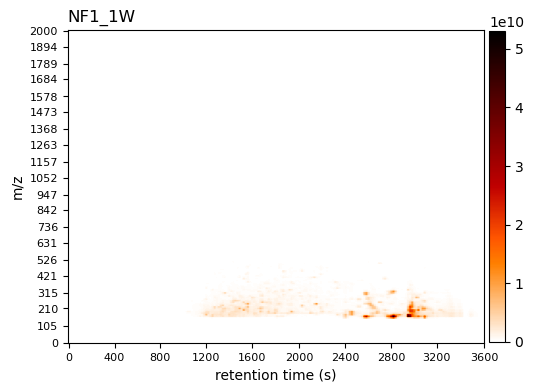

Number of files processed: 1


In [68]:
# find index of file to start at
filename = "NF1_1W.raw"
filename = filename.split(".")[0] + ".mzML"
i = mzml_files.index(os.path.join(DATA_DIR, filename))


# plot spectra
plot_wrapper(mzml_files, start=0)